In [7]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

def generate_random_points(p, A, B):
    def elliptic_curve(x, y, p):
        return (y ** 2) % p == (x ** 3 + (A % p) * x + (B % p)) % p

    points = []
    for x in range(p):
        for y in range(p):
            if elliptic_curve(x, y, p):
                points.append((x, y))
    return points

def extended_euclidean_algorithm(a, b):
    s, old_s = 0, 1
    t, old_t = 1, 0
    r, old_r = b, a

    while r != 0:
        quotient = old_r // r
        old_r, r = r, old_r - quotient * r
        old_s, s = s, old_s - quotient * s
        old_t, t = t, old_t - quotient * t

    return old_r, old_s % b, old_t % a

def inverse(n, p):
    gcd, x, y = extended_euclidean_algorithm(n, p)
    assert (n * x + p * y) % p == gcd

    if gcd != 1:
        raise ValueError(
            '{} has no multiplicative inverse modulo {}'.format(n, p))
    else:
        return x

def add_points(p1, p2, p, A):
    x1, y1 = p1[0], p1[1]
    x2, y2 = p2[0], p2[1]

    if p1 == (0, 0):
        return p2
    elif p2 == (0, 0):
        return p1
    elif x1 == x2 and y1 != y2:
        return (0, 0)

    if p1 == p2:
        m = ((3 * x1 ** 2 + A % p) * inverse((2 * y1) % p, p)) % p
    else:
        m = ((y1 - y2) * inverse((x1 - x2) % p, p)) % p

    x3 = ((m ** 2) - x1 - x2) % p
    y3 = (y1 + m * (x3 - x1)) % p

    return [x3, -y3 % p]

def point_order(point, p, A):
    i = 1
    new_point = add_points(point, point, p, A)
    while new_point != (0, 0):
        new_point = add_points(new_point, point, p, A)
        i += 1

    return i

def sieve(n):
    primes = 2 * [False] + (n - 1) * [True]
    for i in range(2, int(n ** 0.5 + 1.5)):
        if primes[i]:
            primes[i*i::i] = [False] * len(primes[i*i::i])
    return [prime for prime, checked in enumerate(primes) if checked]

def print_curve_equation(p, A, B):
    print("y^2 = x^3 + {0} * x + {1} (mod {2})".format(A % p, B % p, p))

def run(sugg):
    primes = sieve(sugg)
    p = primes[-1]

    start = time.time()

    points = generate_random_points(p, A, B)

    points_num = len(points)

    print_curve_equation(p, A, B)
    print("Elliptic curve order = {0}".format(points_num))

    point = random.choice(points)

    print("Point order {0}: {1}".format(point, point_order(point, p, A)))
    print("Time: {0}".format(time.time() - start))


if __name__ == '__main__':
    A = random.randint(1000000000, 10000000000)
    B = random.randint(1000000000, 10000000000)

    suggest = [23000]

    for i in suggest:
        print('P suggestion = {0}'.format(i))
        run(i)
        print()

P suggestion = 23000
y^2 = x^3 + 6834 * x + 9024 (mod 22993)
Elliptic curve order = 23088
Point order (22420, 15202): 23088
Time: 633.4173350334167



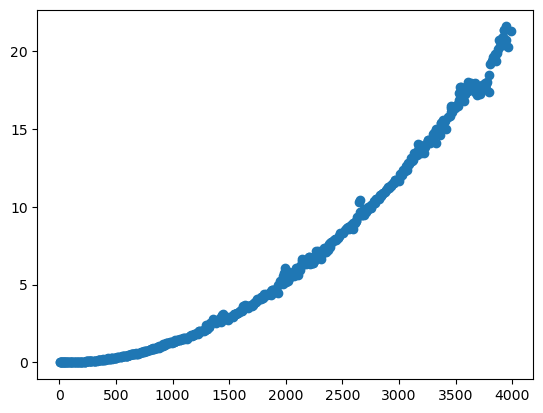

In [9]:
import random
import time
import matplotlib.pyplot as plt

def generate_random_points(p, A, B):
    def elliptic_curve(x, y):
        return (y ** 2) % p == (x ** 3 + (A % p) * x + (B % p)) % p

    points = []
    for x in range(p):
        x_squared = (x ** 2) % p
        x_cubed = x_squared * x % p
        x_a_mod_p = (A % p) * x % p
        for y in range(p):
            if ((y ** 2) % p) == (x_cubed + x_a_mod_p + (B % p)) % p:
                points.append((x, y))
    return points

def inverse(n, p):
    return pow(n, p - 2, p)

def add_points(p1, p2, p, A):
    x1, y1 = p1[0], p1[1]
    x2, y2 = p2[0], p2[1]

    if p1 == (0, 0):
        return p2
    elif p2 == (0, 0):
        return p1
    elif x1 == x2 and y1 != y2:
        return (0, 0)

    if x1 == x2 and y1 == (-y2 % p):
        return (0, 0)
    
    x1_squared = (x1 ** 2) % p
    x1_cubed = x1_squared * x1 % p
    x2_squared = (x2 ** 2) % p
    x2_cubed = x2_squared * x2 % p

    if p1 == p2:
        m = ((3 * x1_squared + A) * inverse(2 * y1, p)) % p
    else:
        m = ((y1 - y2) * inverse(x1 - x2, p)) % p

    x3 = (m ** 2 - x1 - x2) % p
    y3 = (y1 + m * (x3 - x1)) % p

    return [x3, -y3 % p]

def point_order(point, p, A):
    new_point = point
    i = 1
    while True:
        new_point = add_points(new_point, point, p, A)
        if new_point == (0, 0):
            break
        i += 1
    return i

def sieve(n):
    primes = [True] * (n+1)
    primes[0] = primes[1] = False
    p = 2
    while p ** 2 <= n:
        if primes[p]:
            for i in range(p ** 2, n+1, p):
                primes[i] = False
        p += 1
    return [p for p, is_prime in enumerate(primes) if is_prime]

def time_to_compute(p, A, B):
    start = time.time()
    points = generate_random_points(p, A, B)
    points_num = len(points)
    point = random.choice(points)
    order = point_order(point, p, A)
    stopTime = time.time() - start
    return stopTime

A = random.randint(1000000000, 10000000000)
B = random.randint(1000000000, 10000000000)

primes = sieve(4000)
stat = []

for p in primes[2:]:
    stat.append(time_to_compute(p, A, B))

plt.scatter(primes[2:], stat)
plt.show()